# Data science: From classical to Quantum models
###### By: J. A. Orduz

## Contents

1. [Modules, packages, and other tools](#packages)

1. [Versions packages](#versions)

1. [References](#references)


## Classical model world with data!

## Modules, packages, and other tools <a name="packages"></a>

To measure the elapsed time. 

In [1]:
import time

In [2]:
start_time = time.time()

In [3]:
from platform import python_version
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

We introduce a line to draw the graphs in the nb

In [4]:
%matplotlib inline

We generate and plot the data set

In [5]:
n_samples = 200
m_columns = 4
 
dataSet = np.random.normal(loc=[-2, 2, -2, 2], scale=1, size=(n_samples, m_columns))
A = dataSet[:,[0,3]] #Xneg_Ypos
B = dataSet[:,[1,2]] #Xpos_Yneg
C = dataSet[:,[1,3]] #Xpos_Ypos
D = dataSet[:,[0,2]] #Xneg_Yneg

And we plot the data

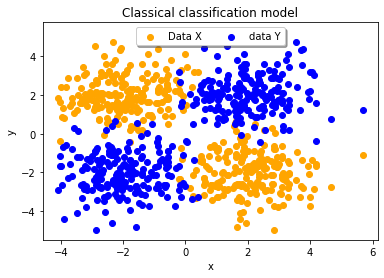

In [6]:
plt.scatter(A[:,0], A[:,1], color = "orange", label = "")
plt.scatter(B[:,0], B[:,1], color = "orange", label = "Data X")
plt.scatter(C[:,0], C[:,1], color = "blue", label = "")
plt.scatter(D[:,0], D[:,1], color = "blue", label = "data Y")
plt.ylabel("y")
plt.xlabel("x")
plt.title('Classical classification model')
plt.legend(loc='upper center', ncol=2, shadow=True)
plt.savefig('figs/ClassiFunction.png', format='png',bbox_inches='tight',dpi=400)
plt.show()

We assign 0 to yellow, and 1 to blue points.

In [7]:
feature = np.concatenate([A, B, C, D], axis=0)
label = np.concatenate([np.ones(n_samples//2)*0, np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))
#print(label, feature)

Values should between ``[-1, 1]``, therefore we introduce a factor, ``factorNorm.`` In addition, use the function $x_0 \omega_0 + x_1 \omega_1 +\omega_2.$ 

We now create the model, and normalize to $-1$ or $1.$ Note, we have $\tan^{-1}$ function, which a good option

In [8]:
def model(x, w):
    return np.abs(np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2))

We

In [9]:
limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)
    print(time.strftime("%H:%M:%S",time.gmtime(time.time() - start_time)))
    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange", label = "Data X")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue", label = "Data Y")
    plt.ylabel("y")
    plt.xlabel("x")
    plt.title('Classical classification model')
    plt.legend(loc='upper center', ncol=2, shadow=True)
    plt.axis((-limit, limit, -limit, limit))
    plt.colorbar(im)
    plt.savefig('figs/Classi_AFunction.png', format='png',bbox_inches='tight',dpi=400)
    plt.show()

We compute the error

In [10]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)

In [11]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

We train

epoch 0 loss 0.3023041951975164
00:00:07


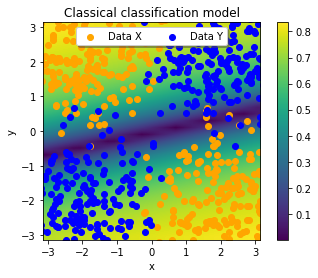

epoch 10 loss 0.29837538153541066
00:00:11


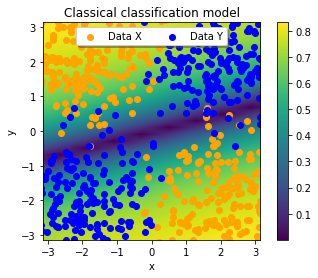

epoch 20 loss 0.29714629255827196
00:00:14


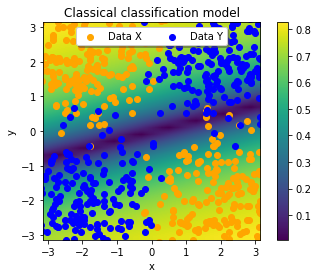

epoch 30 loss 0.29606812607415284
00:00:20


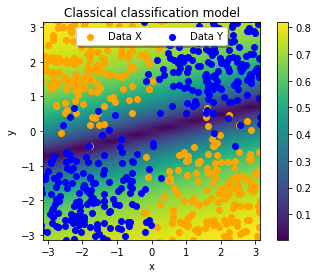

epoch 40 loss 0.2951118372901362
00:00:28


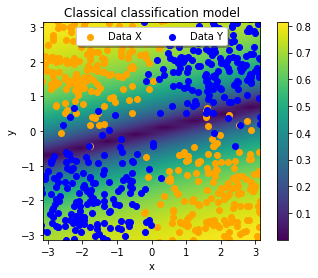

epoch 50 loss 0.29428008760459434
00:00:32


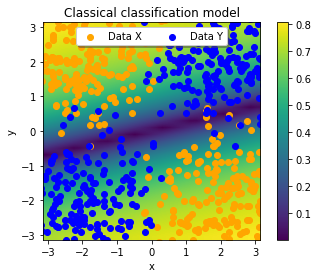

epoch 60 loss 0.2935713692908773
00:00:36


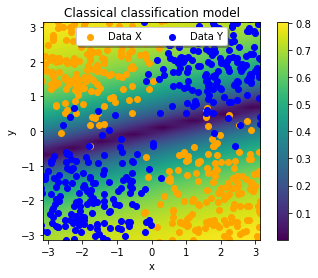

epoch 70 loss 0.2929799560182928
00:00:40


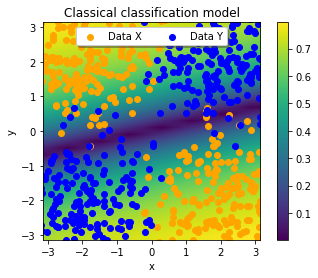

epoch 80 loss 0.2924965634420808
00:00:44


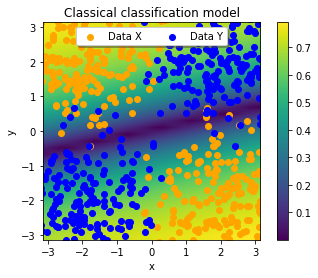

epoch 90 loss 0.29210934844928343
00:00:48


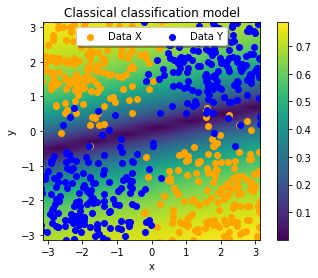

epoch 100 loss 0.29180506051500704
00:00:51


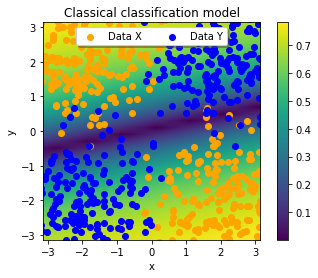

In [12]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 10 == 0:
        print("epoch", epoch, "los                                                                  s", average_loss(w,data))
        plot(model)     
        #clear_output(wait=True)

## Version packages <a name="versions"></a>

In [13]:
print("python version: ", python_version())
print("pennylane version: ", qml.__version__)

python version:  3.7.9
pennylane version:  0.23.1


## References <a name="references"></a>


1. Tutorial: https://tinyurl.com/y6mh4bq8